In [ ]:
'''
Basic example originally from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

# FeedForward Network

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/ryan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ryan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Prepare Data

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [3]:
def test_model(model):
    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))


    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history 

## No Hidden Layers

In [4]:
no_hidden_model = Sequential()
no_hidden_model.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

no_hidden_history = test_model(no_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5931 - acc: 0.8534 - val_loss: 0.3424 - val_acc: 0.9067
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.3311 - acc: 0.9080 - val_loss: 0.2980 - val_acc: 0.9173
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3015 - acc: 0.9160 - val_loss: 0.2848 - val_acc: 0.9196
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.2880 - acc: 0.9192 - val_loss: 0.2784 - val_acc: 0.9228
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step

# One Hidden Layer

In [6]:
one_hidden_model = Sequential()
one_hidden_model.add(Dense(512, activation='relu', input_shape=(784,)))
one_hidden_model.add(Dropout(0.2))
one_hidden_model.add(Dense(num_classes, activation='softmax'))

one_hidden_history = test_model(one_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2746 - acc: 0.9195 - val_loss: 0.1417 - val_acc: 0.9574
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1192 - acc: 0.9650 - val_loss: 0.0913 - val_acc: 0.9721
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - los

# Two Hidden Layers

In [7]:
two_hidden_model = Sequential()
two_hidden_model.add(Dense(512, activation='relu', input_shape=(784,)))
two_hidden_model.add(Dropout(0.2))
two_hidden_model.add(Dense(512, activation='relu'))
two_hidden_model.add(Dropout(0.2))
two_hidden_model.add(Dense(num_classes, activation='softmax'))

two_hidden_history = test_model(two_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2585

## Three Hidden Layers

In [12]:
three_hidden_model = Sequential()
three_hidden_model.add(Dense(512, activation='relu', input_shape=(784,)))
three_hidden_model.add(Dropout(0.2))
three_hidden_model.add(Dense(512, activation='relu'))
three_hidden_model.add(Dropout(0.2))
three_hidden_model.add(Dense(512, activation='relu'))
three_hidden_model.add(Dropout(0.2))
three_hidden_model.add(Dense(num_classes, activation='softmax'))

three_hidden_history = test_model(three_hidden_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

## Plotting

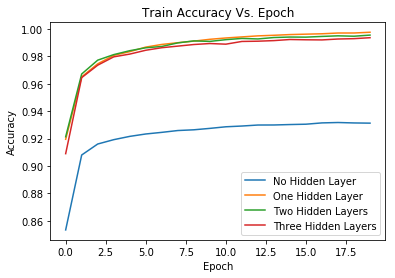

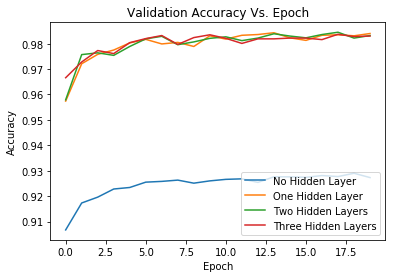

In [14]:
plt.figure(1)
plt.title("Train Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
# summarize history for accuracy  
plt.plot(no_hidden_history.history['acc']) 
plt.plot(one_hidden_history.history['acc']) 
plt.plot(two_hidden_history.history['acc'])
plt.plot(three_hidden_history.history['acc'])
plt.legend(['No Hidden Layer', 'One Hidden Layer', 'Two Hidden Layers', 'Three Hidden Layers'], loc='lower right') 

plt.figure(2)
plt.title("Validation Accuracy Vs. Epoch")
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
# summarize history for accuracy  
plt.plot(no_hidden_history.history['val_acc']) 
plt.plot(one_hidden_history.history['val_acc']) 
plt.plot(two_hidden_history.history['val_acc'])
plt.plot(three_hidden_history.history['val_acc'])
plt.legend(['No Hidden Layer', 'One Hidden Layer', 'Two Hidden Layers', 'Three Hidden Layers'], loc='lower right') 